In [1]:
import numpy as np 
import pandas as pd

### Load the Data

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### EDA

In [3]:
books.head(n=3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
users.head(n=3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [5]:
ratings.head(n=3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


#### Check Null Values

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### Duplicates

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

#### Data Pre-processing
    - merge books and ratings data set based on ISBN number to get book title + ratings

In [13]:
book_ratings = pd.merge(books, ratings, on='ISBN')

In [14]:
book_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


### Popularity Based RS 
    - no complex formula: show  books with the highest average ratings 
        - problem: there can be a book with 2 revieves->5/5 then the book is going to be on top
        - criteria: book has to have at least 250 reviews to be considered. 

In [15]:
# Count the number of ratings and average rating for each book
book_stats = book_ratings.groupby(['Book-Title'])['Book-Rating'].agg(['count', 'mean'])
# group book-title because every book has different isbn but same name like harry potter.

# Filter the books with at least 250 reviews
popular_books = book_stats[book_stats['count'] >= 250]

# Sort the books by average rating in descending order
popular_books = popular_books.sort_values(by='mean', ascending=False)


In [16]:
popular_books

,count,mean
Book-Title,,
Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
Harry Potter and the Goblet of Fire (Book 4),387,5.824289
Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...
Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
Whispers,286,2.199301
Presumed Innocent,294,2.139456


In [17]:
popular_books.reset_index(inplace=True)

In [18]:
# top 50 books 
top_50_books = pd.DataFrame(popular_books[0:50])

In [19]:
top_50_books.shape

(50, 3)

In [20]:
top_50_books.rename(columns={'count': 'num_rating', 'mean': 'avg_rating'}, inplace=True)

In [21]:
top_50_books

,Book-Title,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
5,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
6,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
7,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
8,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
9,To Kill a Mockingbird,510,4.700000


In [21]:
#try to get yr,image,publisher: to do this merge again on what is similar- 'Book-Title'
top_50_books_df = pd.merge(top_50_books, books, on='Book-Title')

In [22]:
top_50_books_df

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [30]:
# More rows ^ so drop dups 
top_50_books_df = top_50_books_df.drop_duplicates('Book-Title')

In [32]:
top_50_books_df = top_50_books_df[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating']]

In [33]:
top_50_books_df

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [23]:
top_50_books_df.columns

Index(['Book-Title', 'num_rating', 'avg_rating', 'ISBN', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [24]:
top_50_books_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [43]:
# Drop duplicates based on Book-Title column and keep the latest Year-Of-Publication
top_50_books_df.drop_duplicates(subset=['Book-Title'], keep='last', inplace=True)

### Collaborative Based RS 
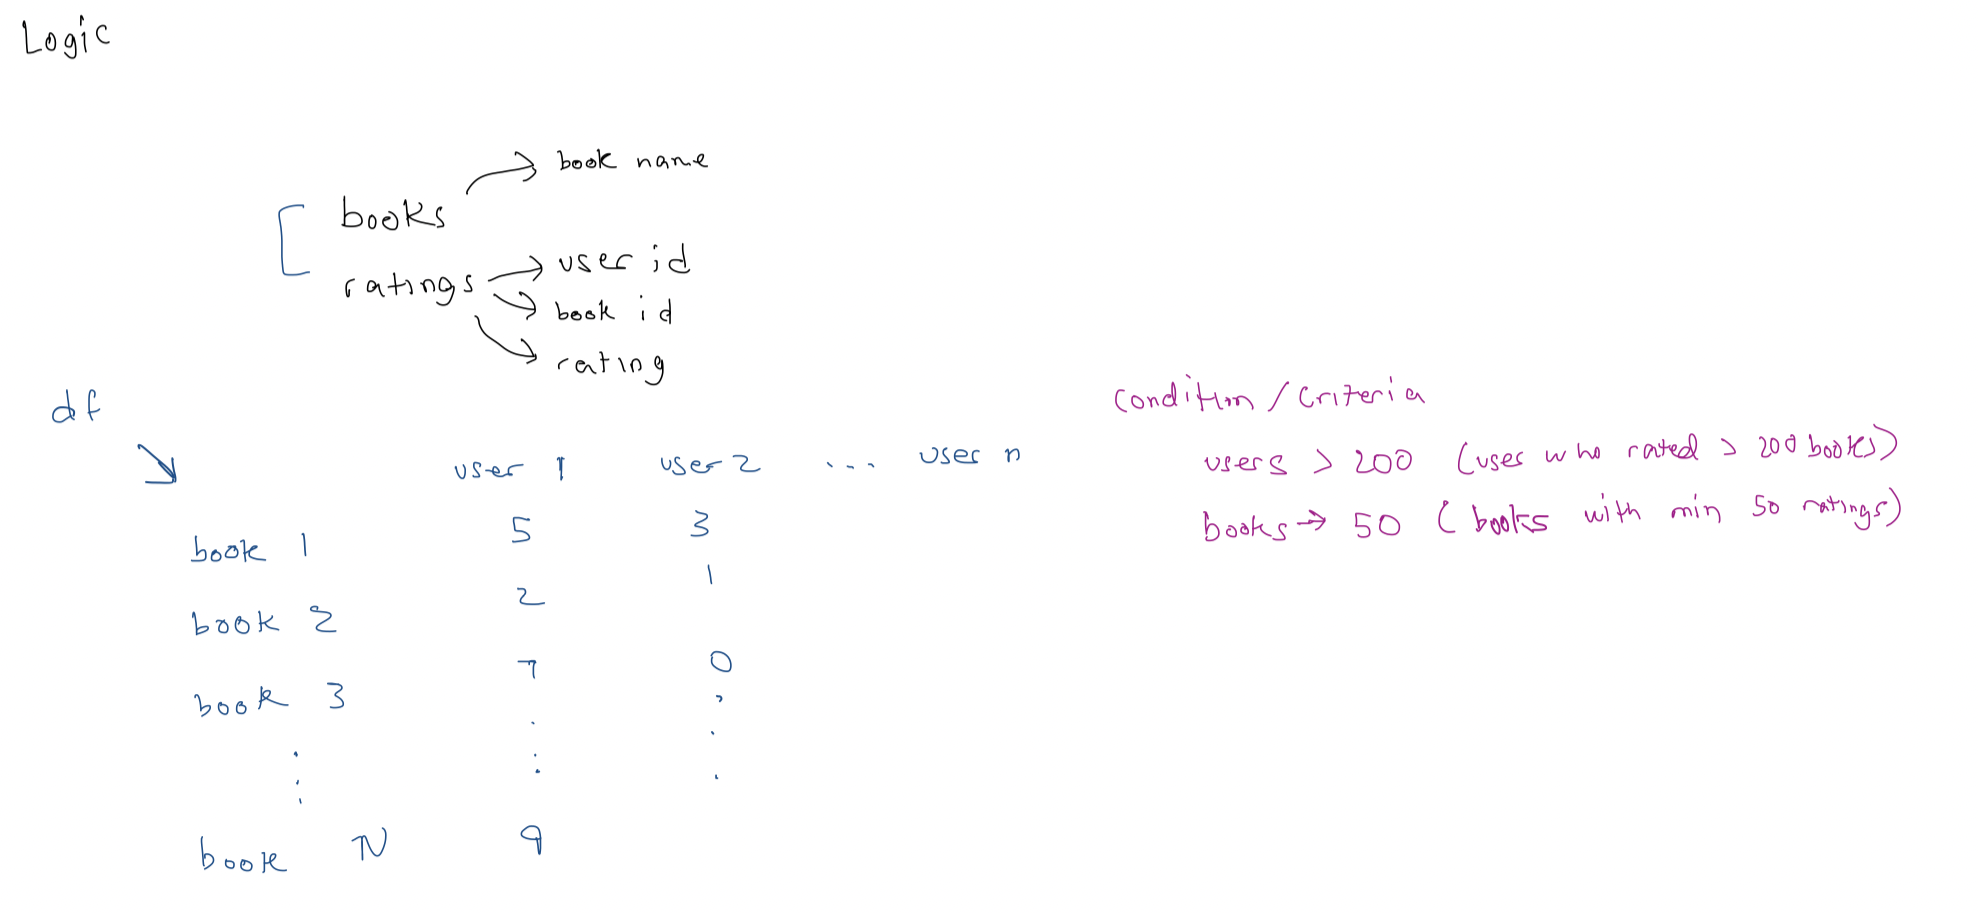

#### 1. Filter based on Users who rated more than 200 books

In [25]:
# Count the number of ratings each user has made
user_ratings = book_ratings['User-ID'].value_counts()

# Filter the users who have made more than 200 ratings
prolific_users = user_ratings[user_ratings >= 200].index.tolist()

# Create a new dataframe containing only the ratings made by prolific users
prolific_ratings = book_ratings[book_ratings['User-ID'].isin(prolific_users)]

In [26]:
prolific_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
...,...,...,...,...,...,...,...,...,...,...
1031124,0231128444,Slow Food(The Case For Taste),Carlo Petrini,2003,Columbia University Press,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,http://images.amazon.com/images/P/0231128444.0...,275970,0
1031125,0520242335,Strong Democracy : Participatory Politics for ...,Benjamin R. Barber,2004,University of California Press,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,http://images.amazon.com/images/P/0520242335.0...,275970,0
1031126,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,275970,0
1031127,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,275970,0


#### 2. Filter based on Books with 50 ratings at least

In [27]:
prolific_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [28]:
# Group the book ratings by title and count the number of ratings for each book
book_counts = prolific_ratings.groupby('Book-Title')['Book-Rating'].count()

# Filter the books with at least 50 ratings
popular_books_50_ratingsAtleast = book_counts[book_counts >= 50]

# Get the indexes of popular books w/ 50 ratings  
popular_book_titles = popular_books_50_ratingsAtleast.index


In [29]:
prolific_ratings['Book-Title'].isin(popular_book_titles)

3          False
6          False
7          False
10         False
21         False
           ...  
1031124    False
1031125    False
1031126    False
1031127    False
1031128    False
Name: Book-Title, Length: 475007, dtype: bool

In [30]:
prolific_ratings[prolific_ratings['Book-Title'].isin(popular_book_titles)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [31]:
final_ratings = prolific_ratings[prolific_ratings['Book-Title'].isin(popular_book_titles)]

In [48]:
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [32]:
pivot_table=final_ratings.pivot_table(index='Book-Title', columns='User-ID',values='Book-Rating')

In [33]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [34]:
pivot_table.fillna(0,inplace=True)

In [46]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Find Similarities ( by calculating distances)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_score=cosine_similarity(pivot_table)

In [38]:
similarity_score[0] # shows the distance between book 1 with other books 

array([1.        , 0.0999137 , 0.01189468, 0.        , 0.05229234,
       0.02703559, 0.08005247, 0.133798  , 0.03177829, 0.03573298,
       0.0226271 , 0.06592522, 0.020304  , 0.09425025, 0.1304464 ,
       0.08089641, 0.10866788, 0.0496928 , 0.02453052, 0.11405415,
       0.        , 0.13965274, 0.07645776, 0.05992325, 0.08499677,
       0.        , 0.06829594, 0.13307519, 0.07404925, 0.11854319,
       0.007483  , 0.01435345, 0.        , 0.07761015, 0.04406341,
       0.0151626 , 0.09251799, 0.01776199, 0.02543351, 0.07778745,
       0.11379679, 0.0554492 , 0.08139372, 0.08254087, 0.08560054,
       0.05350252, 0.0534403 , 0.26331669, 0.09527704, 0.05861375,
       0.08728505, 0.06575169, 0.        , 0.04353225, 0.01871487,
       0.        , 0.05484345, 0.00531237, 0.07674541, 0.05085288,
       0.18422052, 0.        , 0.01208759, 0.0290784 , 0.04169477,
       0.12354122, 0.16140808, 0.        , 0.1301383 , 0.06445396,
       0.        , 0.        , 0.        , 0.10686088, 0.02734

In [39]:
def recommend(book_title):
        # Get the row index for the input book title
    try:
        book_idx = pivot_table.index.get_loc(book_title)
    except KeyError:
        return f"'{book_title}' not found in book ratings data."
    #---------------------------------------------------------------------------
    # Find the index of the book title in the pivot table
    book_index = pivot_table.index.get_loc(book_title)
    
    # Calculate the cosine similarity score between all books in the pivot table
    similarity_score = cosine_similarity(pivot_table)
    
    # Find the indices of the top 5 books with the highest similarity score
    # to the input book title (excluding the input book title itself)
    similar_books_indices = similarity_score[book_index].argsort()[-6:-1][::-1]
    
    # Get the book titles corresponding to the similar_books_indices
    # and put them into a list
    similar_books = list(pivot_table.index[similar_books_indices])
    
    #Print similar books
    for i in similar_books:
        print(i)
    # Return the list of top 5 similar books
    # return similar_books


In [44]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


### Exporting Files to PyCharm for deployment

In [45]:
import pickle
pickle.dump(top_50_books_df,open('top_50_books_df.pkl','wb'))

In [47]:
import pickle
pickle.dump(pivot_table,open('pivot_table_df.pkl','wb'))

In [53]:
pickle.dump(final_ratings, open('pre_pivot.pkl','wb'))

In [54]:
final_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')